In [1]:
import numpy as np
import pandas as pd

a = np.random.random([5,5])
a

array([[ 0.90933901,  0.22652413,  0.07463813,  0.35407755,  0.05269881],
       [ 0.52470618,  0.37085445,  0.97982064,  0.26418055,  0.67395678],
       [ 0.14104268,  0.65712395,  0.94387734,  0.22048663,  0.66995075],
       [ 0.08995081,  0.4850887 ,  0.08652551,  0.18466783,  0.62033381],
       [ 0.96749869,  0.85017485,  0.65265359,  0.6246742 ,  0.32640843]])

In [2]:
df = pd.DataFrame(a)
df

,0,1,2,3,4
0,0.909339,0.226524,0.074638,0.354078,0.052699
1,0.524706,0.370854,0.979821,0.264181,0.673957
2,0.141043,0.657124,0.943877,0.220487,0.669951
3,0.089951,0.485089,0.086526,0.184668,0.620334
4,0.967499,0.850175,0.652654,0.624674,0.326408


In [3]:
df.mean()

0    0.526507
1    0.517953
2    0.547503
3    0.329617
4    0.468670
dtype: float64

In [4]:
a.mean() # 可以看到numpy计算的平均值为全部元素的mean，DataFrame为每列的mean

0.47805016096266312

In [7]:
import matplotlib.pyplot as plt

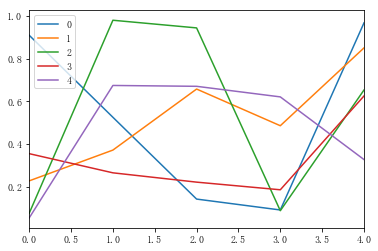

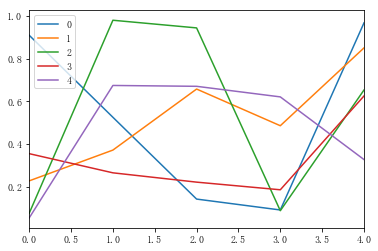

In [8]:
df.plot()
plt.show()

rolling statistics 滚动统计量，马上涉及股票的均线（simple moving average）概念
例如从第一天开始，求1-20天的平均收益率，然后延后一天，即继续求2-21天的平均收益率，得到一组延后的线

滚动标准差则是股票需要关注的量，因为它反映了波动的大小，当有足够大的波动时，就可以考虑买入或卖出了

然后就有了cfa中布林带的说法，在滚动标准差线上做上下两条相差2个标准差的线。Bollinger Bands®

In [ ]:
pd.rolling_mean(arg, window = 20) # from pandas.stats.moments
pd.rolling_std(arg, window = 20)

In [9]:
pd.rolling_mean

<function pandas.stats.moments._rolling_func.<locals>.f>

布林带计算

In [ ]:
upper_band = rm + rstd * 2
lower_band = rm - rstd * 2

Daily returns 每日收益率的计算，=当天价格/前一天价格 - 1

需要注意的是，计算日收益需要将copy另一个同样的数据来计算，如下

In [ ]:
daily_returns = df.copy()

In [ ]:
daily_returns[1:] = (df[1:] / df[:-1].values) - 1
daily_returns.ix[0, :] = 0 # 第一天没有数据，所以设为0

In [ ]:
daily_returns = (df / df.shift(1)) - 1 # 第二种方法
daily_returns.ix[0, :] = 0

In [ ]:
cumulative returns = (df / df[0]) # 累计收益率